<a href="https://colab.research.google.com/github/jatmdm/dgg-badwords/blob/master/dgg_bad_words.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from datetime import datetime
import requests
import numpy as np
import matplotlib.pyplot as plt
import nltk
import pandas as pd
import collections

In [0]:
user = "" #@param {type:"string"}
base_url = 'https://dgg.overrustlelogs.net/Destinygg%20chatlog/'
# user = "Destiny"

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# year = 2018
years = [2013, 2014, 2015, 2016, 2017, 2018, 2019]
req_urls = []
m_y = []

In [0]:
bad_words = ['chink', 'nigger', 'gook', 'sandnigger', 'fag', 'faggot', 'coon', 'kike']

In [209]:
for y in years:
  for m in months:
    req_urls.append( (m + str(y), base_url + m + '%20' + str(y) + '/userlogs/' + user + '.txt') )
print(req_urls)

[('January2013', 'https://dgg.overrustlelogs.net/Destinygg%20chatlog/January%202013/userlogs/.txt'), ('February2013', 'https://dgg.overrustlelogs.net/Destinygg%20chatlog/February%202013/userlogs/.txt'), ('March2013', 'https://dgg.overrustlelogs.net/Destinygg%20chatlog/March%202013/userlogs/.txt'), ('April2013', 'https://dgg.overrustlelogs.net/Destinygg%20chatlog/April%202013/userlogs/.txt'), ('May2013', 'https://dgg.overrustlelogs.net/Destinygg%20chatlog/May%202013/userlogs/.txt'), ('June2013', 'https://dgg.overrustlelogs.net/Destinygg%20chatlog/June%202013/userlogs/.txt'), ('July2013', 'https://dgg.overrustlelogs.net/Destinygg%20chatlog/July%202013/userlogs/.txt'), ('August2013', 'https://dgg.overrustlelogs.net/Destinygg%20chatlog/August%202013/userlogs/.txt'), ('September2013', 'https://dgg.overrustlelogs.net/Destinygg%20chatlog/September%202013/userlogs/.txt'), ('October2013', 'https://dgg.overrustlelogs.net/Destinygg%20chatlog/October%202013/userlogs/.txt'), ('November2013', 'https

In [0]:
no_logs_text = "didn't find any logs for this user\n"
raw_text = ""
for url in req_urls:
  r = requests.get(url[1])
  if r.text[0] is '[': 
    raw_text += r.text
#   print(r.text)

In [0]:
raw_logs = raw_text.split('\n')
raw_logs.remove('')
    

In [0]:
nsfw_datetime = dict()
for log in raw_logs:
  temp_date = datetime.strptime(log[1:20], '%Y-%m-%d %H:%M:%S').date()
  dt = datetime(temp_date.year, temp_date.month, 1)
  text = log[27 + len(user):]
  for bw in bad_words:
    if " " + bw + " " in text.lower():
      print(log)
      if dt not in nsfw_datetime:
        nsfw_datetime[dt] = 1
      else:
        temp = nsfw_datetime[dt]
        temp += 1
        nsfw_datetime[dt] = temp
      break
  

In [0]:
x = []
y = []

for xi, yi in nsfw_datetime.items():
  x.append(xi)
  y.append(yi)

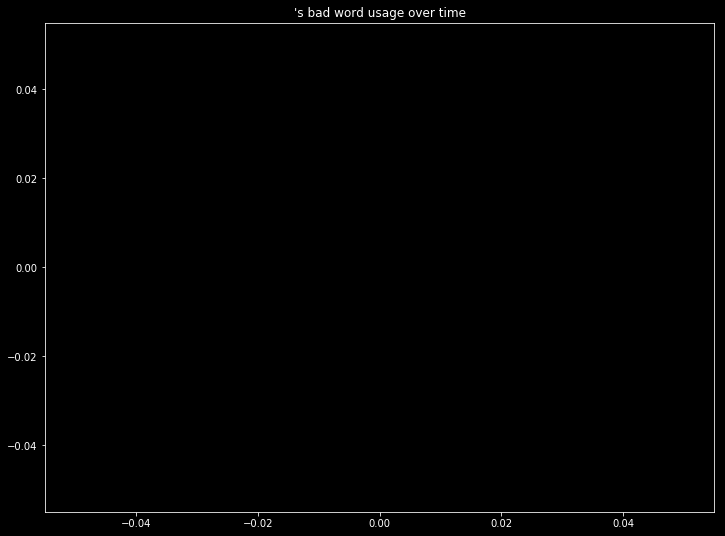

In [214]:
 
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9

plt.title(user + "'s bad word usage over time")
plt.style.use('dark_background')
plt.rcParams["figure.figsize"] = fig_size
plt.bar(x, y, width=25, alpha=0.5)

plt.show()